In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT
# April 2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

Data Loading and Exploration

In [3]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

In [4]:
print(X.shape)

(70000, 784)


In [5]:
np.unique(y, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

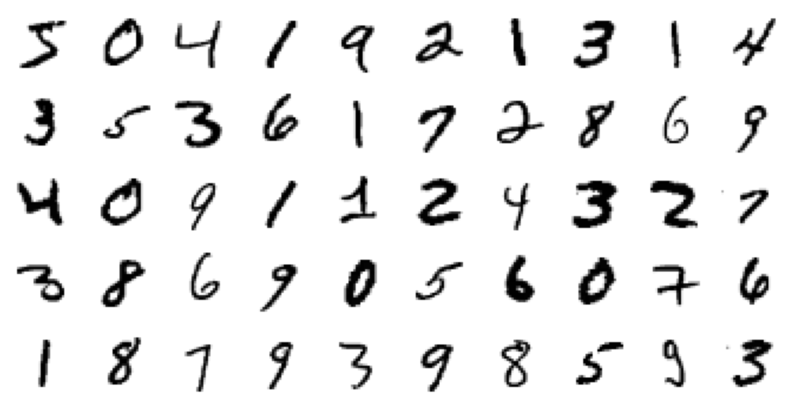

In [6]:
fig, axes = plt.subplots(5, 10, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.axis('off')   
    
plt.savefig('figures/mnist_digits.pdf')

In [7]:
X = X / 255.0  # Scale features to [0, 1]

In [8]:
train_size = 60000
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

Training the Model

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\roi_y\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
print(clf.n_iter_)

[265]


Model Evaluation

In [12]:
print('Training set accuracy:', np.round(clf.score(X_train, y_train), 4))
print('Test set accuracy:' , np.round(clf.score(X_test, y_test), 4))

Training set accuracy: 0.9388
Test set accuracy: 0.9259


In [13]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.953     0.977     0.965       980
           1      0.962     0.979     0.970      1135
           2      0.929     0.901     0.915      1032
           3      0.904     0.912     0.908      1010
           4      0.936     0.939     0.937       982
           5      0.895     0.873     0.884       892
           6      0.942     0.951     0.946       958
           7      0.933     0.923     0.928      1028
           8      0.885     0.877     0.881       974
           9      0.910     0.917     0.913      1009

    accuracy                          0.926     10000
   macro avg      0.925     0.925     0.925     10000
weighted avg      0.926     0.926     0.926     10000



In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1 = f1_score(y_test, y_pred, average='micro')

print('Micro Precision:', micro_precision)
print('Micro Recall:', micro_recall)
print('Micro F1-score:', micro_f1)

Micro Precision: 0.9259
Micro Recall: 0.9259
Micro F1-score: 0.9259


Error Analysis

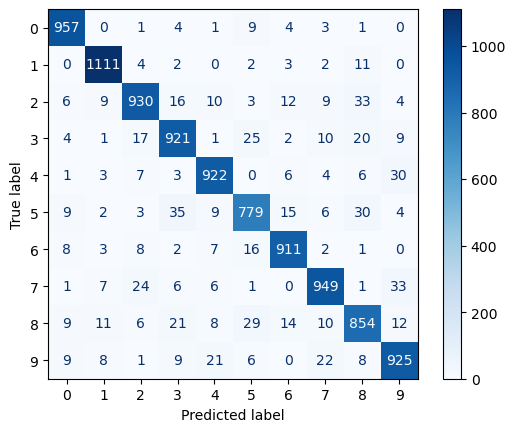

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

plt.savefig('figures/confusion_matrix.pdf')

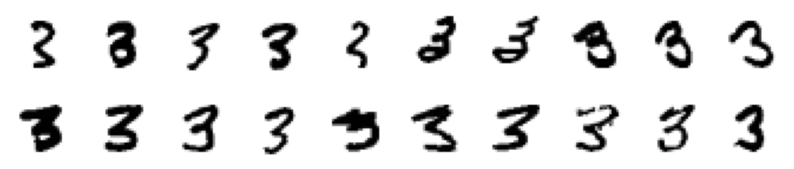

In [16]:
X_3conf8 = X_test[(y_test=='3') & (y_pred=='8')]

fig, axes = plt.subplots(2, 10, figsize=(10, 2))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_3conf8[i].reshape(28, 28), cmap='binary')
    ax.axis('off') 
    
plt.savefig('figures/digit_3_confused_with_8.pdf')

Visualizing the Weights

In [17]:
print(clf.coef_.shape)

(10, 784)


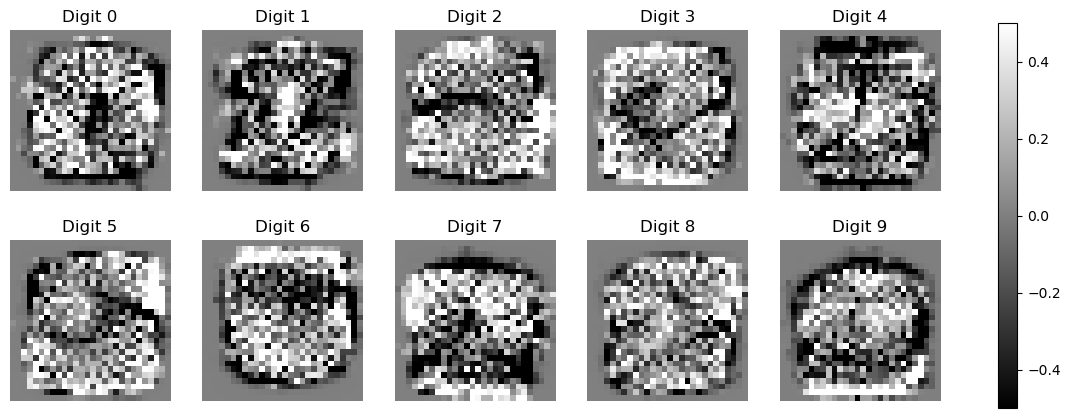

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

for i, ax in enumerate(axes.flat):
    # Reshape the i-th row of the weight matrix to 28x28 and plot it
    img = ax.imshow(clf.coef_[i].reshape(28, 28), cmap='gray', vmin=-0.5, vmax=0.5)
    ax.axis('off')
    ax.set_title(f'Digit {i}')
    
# Add a colorbar to the last plot to show the scale
fig.colorbar(img, ax=axes.flat)
plt.savefig('figures/softmax_model_weights.pdf')